# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Load the Data

In [2]:
diabetes_cleaned = pd.read_csv(r'C:\Users\ashle\OneDrive\Documents\GitHub\Capstone-2\Diabetes_Class_Cleaned.csv', index_col=0)

In [3]:
diabetes_cleaned.head()

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
Patient number,,,,,,,,,,,,,,,
1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes


In [4]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cholesterol      390 non-null    int64  
 1   Glucose          390 non-null    int64  
 2   HDL Chol         390 non-null    int64  
 3   Chol/HDL ratio   390 non-null    float64
 4   Age              390 non-null    int64  
 5   Gender           390 non-null    object 
 6   Height           390 non-null    int64  
 7   Weight           390 non-null    int64  
 8   BMI              390 non-null    float64
 9   Systolic BP      390 non-null    int64  
 10  Diastolic BP     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  Waist/hip ratio  390 non-null    float64
 14  Diabetes         390 non-null    object 
dtypes: float64(3), int64(10), object(2)
memory usage: 48.8+ KB


In [5]:
diabetes_cleaned.describe()

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.230769,107.338462,50.266667,4.524615,46.774359,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385
std,44.666005,53.798188,17.279069,1.736634,16.435911,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212
min,78.000000,48.000000,12.000000,1.500000,19.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000
25%,179.000000,81.000000,38.000000,3.200000,34.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000
50%,203.000000,90.000000,46.000000,4.200000,44.500000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000
75%,229.000000,107.750000,59.000000,5.400000,60.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000
max,443.000000,385.000000,120.000000,19.300000,92.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000


In [6]:
diabetes_cleaned.columns

Index(['Cholesterol', 'Glucose', 'HDL Chol', 'Chol/HDL ratio', 'Age', 'Gender',
       'Height', 'Weight', 'BMI', 'Systolic BP', 'Diastolic BP', 'waist',
       'hip', 'Waist/hip ratio', 'Diabetes'],
      dtype='object')

In [7]:
diabetes_cleaned["Diabetes"].unique()

array(['No diabetes', 'Diabetes'], dtype=object)

In [8]:
# Changed categorical target into numeric values: 1 = Diabetes, 0 = No diabetes
categorical = ["Gender", "Diabetes"]
diabetes_cleaned = pd.get_dummies(diabetes_cleaned, columns=categorical)
print('The data have ', diabetes_cleaned.shape[0], ' rows and ', diabetes_cleaned.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(diabetes_cleaned.columns)))

The data have  390  rows and  17  columns

column names: 

Cholesterol
Glucose
HDL Chol
Chol/HDL ratio
Age
Height
Weight
BMI
Systolic BP
Diastolic BP
waist
hip
Waist/hip ratio
Gender_female
Gender_male
Diabetes_Diabetes
Diabetes_No diabetes


In [9]:
diabetes_cleaned.drop(columns="Diabetes_No diabetes", inplace=True)

In [10]:
diabetes_cleaned.columns

Index(['Cholesterol', 'Glucose', 'HDL Chol', 'Chol/HDL ratio', 'Age', 'Height',
       'Weight', 'BMI', 'Systolic BP', 'Diastolic BP', 'waist', 'hip',
       'Waist/hip ratio', 'Gender_female', 'Gender_male', 'Diabetes_Diabetes'],
      dtype='object')

In [11]:
diabetes_cleaned["Diabetes_Diabetes"].unique()

array([0, 1], dtype=uint8)

# Visualizing the Data

In [12]:
class_counts = diabetes_cleaned["Diabetes_Diabetes"].value_counts()
class_counts

0    330
1     60
Name: Diabetes_Diabetes, dtype: int64

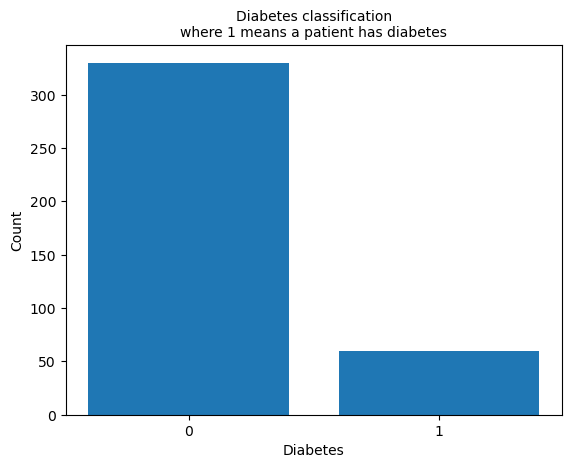

In [13]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_ylabel("Count")
ax.set_xlabel("Diabetes")
ax.set_title('Diabetes classification\nwhere 1 means a patient has diabetes',
              fontsize = 10)
plt.show()

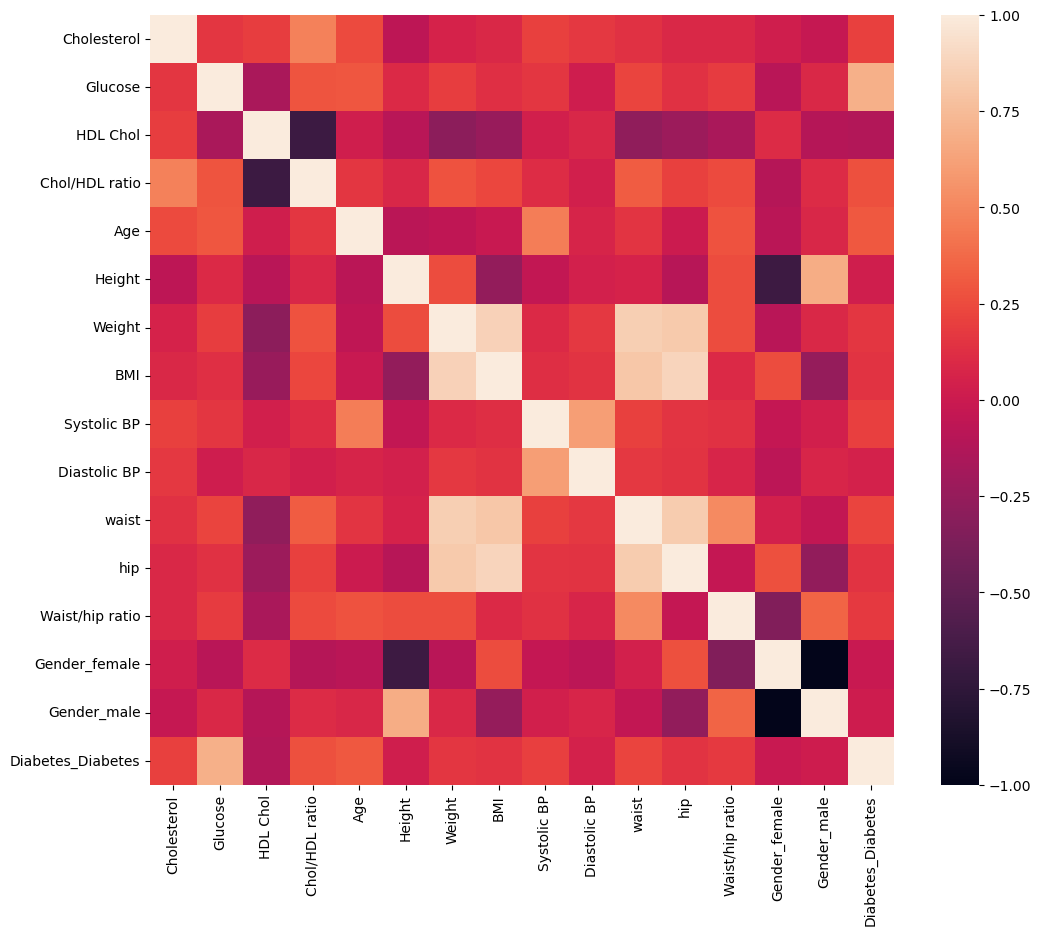

In [14]:
plt.subplots(figsize=(12,10))
sns.heatmap(diabetes_cleaned.corr());

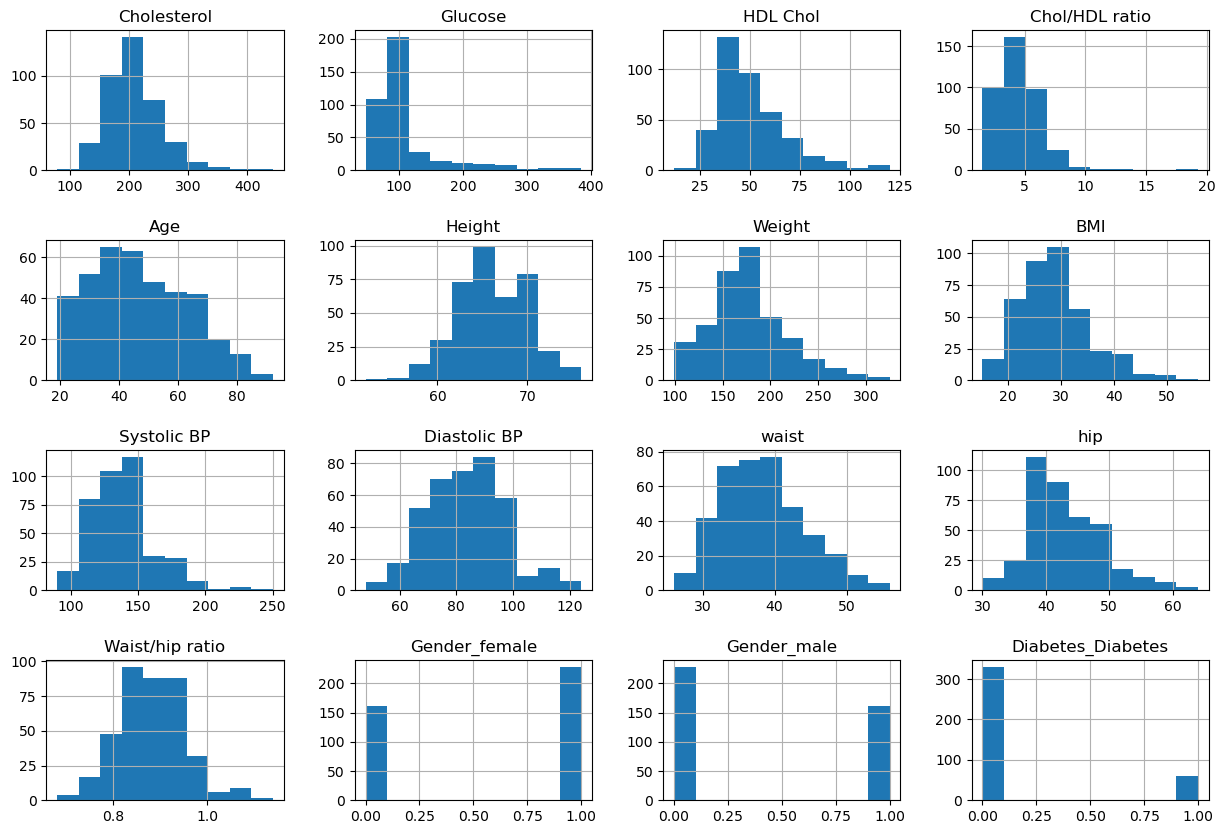

In [15]:
diabetes_cleaned.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

<AxesSubplot:xlabel='Diabetes_Diabetes', ylabel='Cholesterol'>

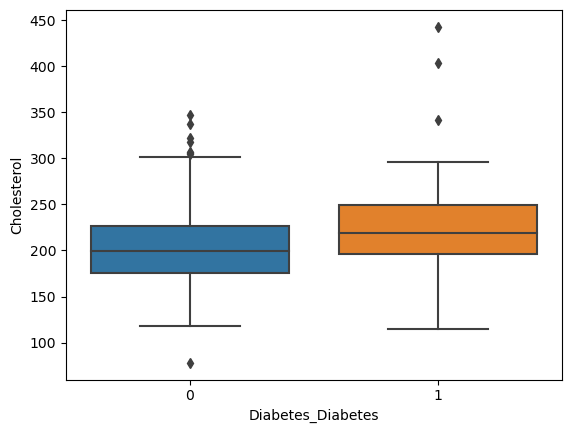

In [16]:
sns.boxplot(data=diabetes_cleaned, x="Diabetes_Diabetes", y="Cholesterol")

<AxesSubplot:xlabel='Diabetes_Diabetes', ylabel='Glucose'>

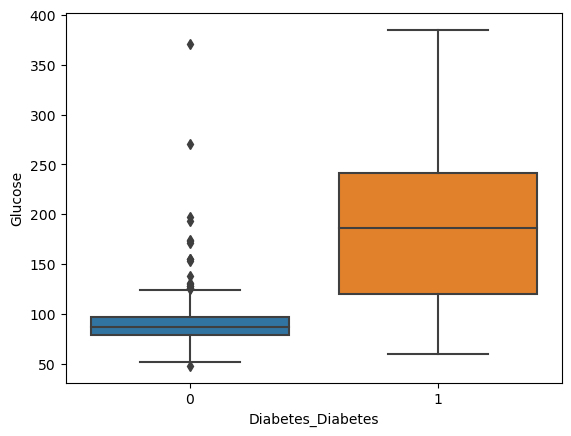

In [17]:
sns.boxplot(data=diabetes_cleaned, x="Diabetes_Diabetes", y="Glucose")

<AxesSubplot:xlabel='Diabetes_Diabetes', ylabel='Age'>

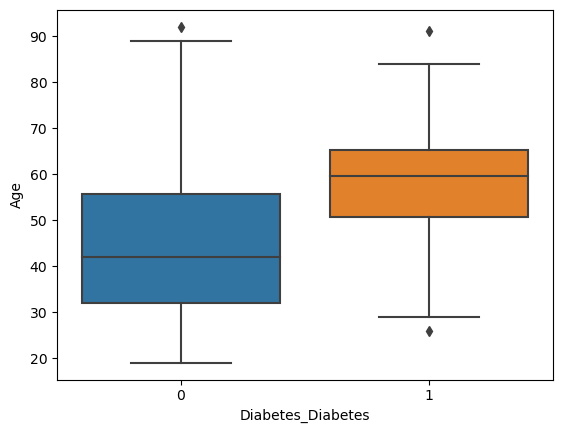

In [18]:
sns.boxplot(data=diabetes_cleaned, x="Diabetes_Diabetes", y="Age")

# Outliers

In [20]:
Q1_Cholesterol = np.quantile(diabetes_cleaned["Cholesterol"], q=0.25)
Q3_Cholesterol = np.quantile(diabetes_cleaned["Cholesterol"], q=0.75)
IQR = Q3_Cholesterol-Q1_Cholesterol

In [24]:
upper_cutoff = Q3_Cholesterol + IQR*1.5
lower_cutoff = Q1_Cholesterol - IQR*1.5

In [46]:
outliers_removed = diabetes_cleaned[~((diabetes_cleaned["Cholesterol"] < (lower_cutoff)) |(diabetes_cleaned["Cholesterol"] > (upper_cutoff)))]

In [47]:
outliers_removed.shape

(379, 16)

<AxesSubplot:xlabel='Diabetes_Diabetes', ylabel='Cholesterol'>

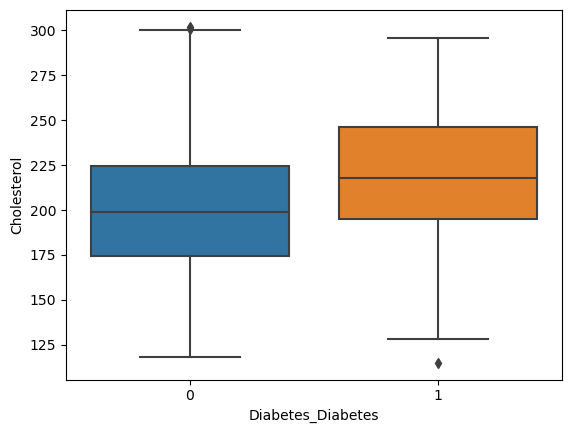

In [49]:
sns.boxplot(data=outliers_removed, x="Diabetes_Diabetes", y="Cholesterol")